<a href="https://colab.research.google.com/github/STEM-tisch/TensorFlow-Lite/blob/master/3.%20Fashion%20MNIST%20with%20TFLite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Fashion MNIST Data set
Load the data set using TF dataset

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds


In [0]:
tfds.disable_progress_bar()

In [3]:
# Load the data set into train, validation & test with 80%, 10% and 10%

(train_images, valid_images, test_images), info = tfds.load("fashion_mnist", with_info=True, as_supervised=True, split=["train[:80%]", "train[80%:90%]", "train[90%:]"])



Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.0.incomplete1L11FI/fashion_mnist-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.0.incomplete1L11FI/fashion_mnist-test.tfrecord
Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.0. Subsequent calls will reuse this data.


In [34]:
num_images = info.splits["train"].num_examples
num_classes = info.features["label"].num_classes

print(num_images)
print (num_classes)

60000
10


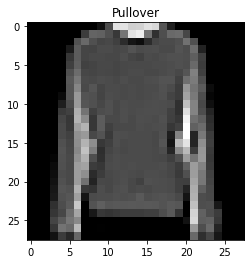

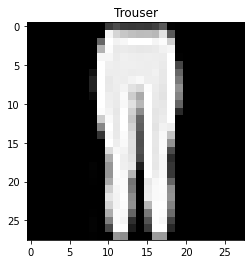

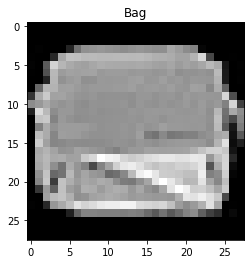

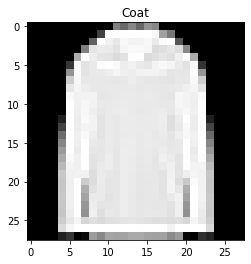

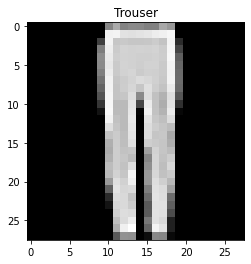

In [35]:
IMAGE_SIZE = 28
IMAGE_SHAPE = (28, 28, 1)

BATCH_SIZE = 32

#Show some images for reference

get_img_label = info.features["label"].int2str

for image, label in train_images.take(5):
  plt.figure()
  plt.imshow(tf.squeeze(image), cmap="gray")
  plt.title(get_img_label(label))


In [0]:
def format_image(image, label):

  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, (28,28)) / 255.0
  return image, label

train_images = train_images.map(format_image)
valid_images = valid_images.map(format_image)
test_images = test_images.map(format_image)


In [37]:

SHUFFLE_SIZE = num_images // 4
SHUFFLE_SIZE


15000

In [0]:
train_batches = train_images.shuffle(SHUFFLE_SIZE).batch(BATCH_SIZE)
valid_batches = valid_images.batch(BATCH_SIZE)
test_batches = test_images.batch(1)

In [42]:
for image, label in valid_batches.take(1):
  pass
image.shape

TensorShape([32, 28, 28, 1])

### Building the Model

In [0]:
model = tf.keras.models.Sequential()

In [0]:
model.add(tf.keras.layers.Conv2D(64, (3,3), input_shape=(28,28,1), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(2, 2))

model.add(tf.keras.layers.Conv2D(32, (3, 3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(2, 2))


model.add(tf.keras.layers.Flatten())

#Fully connected Layer
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10))

In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               102528    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [47]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.RMSprop(lr=0.001), metrics=["accuracy"])

history = model.fit(train_batches, validation_data=valid_batches, epochs=10, verbose=1)

Epoch 1/10
1500/1500 [==============================] - 64s 42ms/step - loss: 1.2033 - accuracy: 0.5610 - val_loss: 0.7769 - val_accuracy: 0.7092
Epoch 2/10
1500/1500 [==============================] - 64s 42ms/step - loss: 0.7221 - accuracy: 0.7268 - val_loss: 0.6634 - val_accuracy: 0.7502
Epoch 3/10
1500/1500 [==============================] - 63s 42ms/step - loss: 0.6457 - accuracy: 0.7564 - val_loss: 0.6200 - val_accuracy: 0.7685
Epoch 4/10
1500/1500 [==============================] - 64s 42ms/step - loss: 0.5903 - accuracy: 0.7780 - val_loss: 0.5615 - val_accuracy: 0.7883
Epoch 5/10
1500/1500 [==============================] - 64s 42ms/step - loss: 0.5409 - accuracy: 0.7968 - val_loss: 0.5249 - val_accuracy: 0.8055
Epoch 6/10
1500/1500 [==============================] - 63s 42ms/step - loss: 0.5034 - accuracy: 0.8107 - val_loss: 0.4625 - val_accuracy: 0.8273
Epoch 7/10
1500/1500 [==============================] - 62s 42ms/step - loss: 0.4726 - accuracy: 0.8243 - val_loss: 0.4363 -